# FIT5196 Assessment 2
#### Student Name:   Huan-Jui, Chang
#### Student ID: 28047397

Date: 21/09/2017
 

Environment: Python 2.7  and Jupyter notebook

Libraries used:
* json (for parse json file)
* pandas (for data frame in python)
* re (for regular expression) 
* numpy (fundamental package for scientific computing)
* matplotlib.pyplot (for 2D-plotting in python)
* sklearn.linear_model (Ridge for Ridge regression, RidgeCV for parameter searching)



## Outline
>** Task 1 ** Import libraries and Parsing the property sales data stored in “data.dat”
>> Task 1.1 Examine and load the data into a Pandas DataFrame <br>
>> Task 1.2 Parse the loaded data so that each sales record has the required attributes
 
>** Task 2 ** Auditing and cleansing the loaded data
>> Task 2.1 Lexical : (eg. typos and spelling mistakes) and Inconsistency errors
Some of the city names are incorrect.<br> I found there are two types of error:
>>>*  spelling error (eg. seatle)<br>
>>>*  Some start with a capital letter but some are not (eg. Seattle vs seattle)<br>

>> Task 2.2  Irregularities, e.g., abnormal data values and data formats 
>>>*  Abnormal data values : Based on the description of data.dat, the value of bathrooms can be either an integer or a fraction ending with .25 , .5 or .75. However I found some data shows abnormal number of bathrooms like  1.05, 2.55, 2.57.
>>>*  Incorrect data formats :  When converting date to datetime format using "pd.to_datetime(df.date)",  the error message shows "day is out of range for month", so some of the number of day should be wrong. So I wrote a loop and use pd.to_datetime() tp convert data type row by row, and use try and except to find out the exceptions. Eventually I found two incorrect rows and fixed them.  
  
>> Task 2.3 Integrity constraints<br>
Three kinds of error are detected:
>>>* sqft_living is not equal to sqft_above + sqft_basement ( In data descirption table, it says that the squrt_living is the sum of sqft_above and sqft_basement.) 
>>>* the year renovated is before the the year built. (the year renovated should be after the the year built.)  
>>>* The living space is larger than the land space  (The land space should be larger than the living space)

>> Task 2.4 Outliers <br>
I tried two methods to identify outliers:  
>>>*  First, I make the scatter plot of sqft_living and price, I tried to find out obvious outliers using the scatter plot
>>>*  Second, I create a new feature: "price_per_sqft_living", which means price per square foot of living space, and it is also "price" divide by "sqft_living". I examine the largest and smallest value to spot the outliers.

>> Task 2.5 Duplications
>>>* In this section, I use duplicated() to detect the duplications. I didn't assign subset parameter, so by default the function will use all of the columns to find the duplication.

>> Task 2.6 Missing value
>>>*  I found column "price" is the only one that we need to impute missing value. Some of value in column "price" is 0. My strategy is to use linear regression to make the prediction. In other words, data that have actual price value is our training data, and I trained a ridge regression model to make the price prediction on those data with missing price.


>** Task 3 ** Export the dataframe after cleaning to .csv file<br>

## Task 1.1 Examine and load the data into a Pandas DataFrame

In [1]:
# Import libraries 
import json # for parse json file
import pandas as pd # for data frame in python
import re # for regular expression in python
from pandas.io.json import json_normalize # to normalize json file
import matplotlib.pyplot as plt  # 2D plotting  # and use %matplotlib inline show the plot in output cell
from sklearn.linear_model import RidgeCV  # parameter searching using cross validation
from sklearn.linear_model import Ridge # Ridge regression
%matplotlib inline     

In [2]:
# to read the JSON data, use the json module
with open ('data.dat') as df:
    data = json.load(df)
# have a look of the data 
data

{u'houses': [{u'address': u'18810 Densmore Ave N, Shoreline, WA 98133, USA',
   u'area': {u'sqft_above': 1340,
    u'sqft_basement': 0,
    u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1340\\ 7912'},
   u'condition': 3,
   u'date': u'20140502T000000',
   u'floors': 1.5,
   u'price': 313000.0,
   u'rooms': u'Number of bathrooms: 1.5; Number of bedrooms: 3',
   u'view': 0,
   u'waterfront': 0,
   u'yr_built': 1955,
   u'yr_renovated': nan},
  {u'address': u'709 W Blaine St, Seattle, WA 98119, USA',
   u'area': {u'sqft_above': 3370,
    u'sqft_basement': 280,
    u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=3650\\ 9050'},
   u'condition': 5,
   u'date': u'20140502T000000',
   u'floors': 2.0,
   u'price': 2384000.0,
   u'rooms': u'Number of bathrooms: 2.5; Number of bedrooms: 5',
   u'view': 4,
   u'waterfront': 0,
   u'yr_built': 1921,
   u'yr_renovated': nan},
  {u'address': u'26206-26214 143rd Ave SE, Kent, WA 98042, USA',
   u'area': {u'sqft_above': 1930,
    u'sqft_basement': 0,

### Examine and load the data
We can see the structure of the data is look like this:
```
{u'houses': [{u'address': u'18810 Densmore Ave N, Shoreline, WA 98133, USA',
   u'area': {u'sqft_above': 1340,
    u'sqft_basement': 0,
    u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1340\\ 7912'},
   u'condition': 3,
   u'date': u'20140502T000000',
   u'floors': 1.5,
   u'price': 313000.0,
   u'rooms': u'Number of bathrooms: 1.5; Number of bedrooms: 3',
   u'view': 0,
   u'waterfront': 0,
   u'yr_built': 1955,
   u'yr_renovated': nan},
  {u'address': ......
```
The data is in name/value pairs, and the data is separated by commas. Also, square brackets hold arrays and curly braces hold objects. Obviously, the 'data.dat' is a json file.

### Flatten out JSON object and load the data into a Pandas DataFrame.
We need to use the JSON normalization function json_normalize() to flatten out the JSON object and make the data become a DataFrame.   


In [3]:
df = json_normalize(data['houses']) # use normalization function json_normalize()
df.head() # show the first 5 rows of dataframe 

,address,area.sqft_above,area.sqft_basement,area.sqft_living/sqft_lot,condition,date,floors,price,rooms,view,waterfront,yr_built,yr_renovated
0,"18810 Densmore Ave N, Shoreline, WA 98133, USA",1340,0,sqft_living/sqft_lot=1340\ 7912,3,20140502T000000,1.5,313000.0,Number of bathrooms: 1.5; Number of bedrooms: 3,0,0,1955,NaN
1,"709 W Blaine St, Seattle, WA 98119, USA",3370,280,sqft_living/sqft_lot=3650\ 9050,5,20140502T000000,2.0,2384000.0,Number of bathrooms: 2.5; Number of bedrooms: 5,4,0,1921,NaN
2,"26206-26214 143rd Ave SE, Kent, WA 98042, USA",1930,0,sqft_living/sqft_lot=1930\ 11947,4,20140502T000000,1.0,342000.0,Number of bathrooms: 2.0; Number of bedrooms: 3,0,0,1966,NaN
3,"857 170th Pl NE, Bellevue, WA 98008, USA",1000,1000,sqft_living/sqft_lot=2000\ 8030,4,20140502T000000,1.0,420000.0,Number of bathrooms: 2.25; Number of bedrooms: 3,0,0,1963,NaN
4,"9105 170th Ave NE, Redmond, WA 98052, USA",1140,800,sqft_living/sqft_lot=1940\ 10500,4,20140502T000000,1.0,550000.0,Number of bedrooms: 4; Number of bathrooms: 2.5,0,0,1976,NaN


## Task 1.2 Parse the loaded data so that each sales record has the required attributes

In [4]:
df.head() # show the first 5 rows of dataframe 

,address,area.sqft_above,area.sqft_basement,area.sqft_living/sqft_lot,condition,date,floors,price,rooms,view,waterfront,yr_built,yr_renovated
0,"18810 Densmore Ave N, Shoreline, WA 98133, USA",1340,0,sqft_living/sqft_lot=1340\ 7912,3,20140502T000000,1.5,313000.0,Number of bathrooms: 1.5; Number of bedrooms: 3,0,0,1955,NaN
1,"709 W Blaine St, Seattle, WA 98119, USA",3370,280,sqft_living/sqft_lot=3650\ 9050,5,20140502T000000,2.0,2384000.0,Number of bathrooms: 2.5; Number of bedrooms: 5,4,0,1921,NaN
2,"26206-26214 143rd Ave SE, Kent, WA 98042, USA",1930,0,sqft_living/sqft_lot=1930\ 11947,4,20140502T000000,1.0,342000.0,Number of bathrooms: 2.0; Number of bedrooms: 3,0,0,1966,NaN
3,"857 170th Pl NE, Bellevue, WA 98008, USA",1000,1000,sqft_living/sqft_lot=2000\ 8030,4,20140502T000000,1.0,420000.0,Number of bathrooms: 2.25; Number of bedrooms: 3,0,0,1963,NaN
4,"9105 170th Ave NE, Redmond, WA 98052, USA",1140,800,sqft_living/sqft_lot=1940\ 10500,4,20140502T000000,1.0,550000.0,Number of bedrooms: 4; Number of bathrooms: 2.5,0,0,1976,NaN


Observations:
* Some required columns are combined in this table: 
> * First, "bedrooms" and "bathrooms" are combined into column "rooms".
> * Second, column "sqft_living", "sqft_lot" are combined into column "area.sqft_living/sqft_lot".
> * Third, "street", "city", "statezip", "country" are combined into the column "address".

* Name of Some columns need to be changed: "area.sqft_above" should be changed to "sqft_above", and "area.sqft_basement" should be changed to "sqft_basement"


* Column data type checking: type of column "date" should be date instead of string object. Also, after we seperate columns "room", "address", we need to check data type again as new columns will be generated then.

In [5]:
df['rooms'].head(10) # show first 10 rows of column "rooms" and found the inconsistency

0     Number of bathrooms: 1.5; Number of bedrooms: 3
1     Number of bathrooms: 2.5; Number of bedrooms: 5
2     Number of bathrooms: 2.0; Number of bedrooms: 3
3    Number of bathrooms: 2.25; Number of bedrooms: 3
4     Number of bedrooms: 4; Number of bathrooms: 2.5
5     Number of bathrooms: 1.0; Number of bedrooms: 2
6     Number of bathrooms: 2.0; Number of bedrooms: 2
7     Number of bathrooms: 2.5; Number of bedrooms: 4
8     Number of bathrooms: 2.5; Number of bedrooms: 3
9     Number of bathrooms: 2.0; Number of bedrooms: 4
Name: rooms, dtype: object

Observation:
* The order of "Number of bathrooms" and "Number of bedrooms" is inconsistent. Some rows start with "Number of bathrooms" while some rows start with "Number of bedrooms"

In [6]:
# use regular expression to extract the "bedroom" number
df['bedrooms'] = df['rooms'].apply(lambda x: re.search(r'bedrooms: (\d*(?:\.\d*)*)',x).group(1)) 
df['bedrooms']=df['bedrooms'].astype("int")   # change its datatype into int
# check the first five rows
df['bedrooms'].head()

0    3
1    5
2    3
3    3
4    4
Name: bedrooms, dtype: int32

In [7]:
# use regular expression to extract the "bathroom" number
df['bathrooms'] = df['rooms'].apply(lambda x: re.search(r'bathrooms: (\d*(?:\.\d*)*)',x).group(1)) 
df['bathrooms']=df['bathrooms'].astype("float")   # change its datatype into float
# check the first five rows
df['bathrooms'].head()

0    1.50
1    2.50
2    2.00
3    2.25
4    2.50
Name: bathrooms, dtype: float64

In [8]:
# Delete column "rooms"
df.drop('rooms', axis=1, inplace=True)
df.head()

,address,area.sqft_above,area.sqft_basement,area.sqft_living/sqft_lot,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,bedrooms,bathrooms
0,"18810 Densmore Ave N, Shoreline, WA 98133, USA",1340,0,sqft_living/sqft_lot=1340\ 7912,3,20140502T000000,1.5,313000.0,0,0,1955,NaN,3,1.50
1,"709 W Blaine St, Seattle, WA 98119, USA",3370,280,sqft_living/sqft_lot=3650\ 9050,5,20140502T000000,2.0,2384000.0,4,0,1921,NaN,5,2.50
2,"26206-26214 143rd Ave SE, Kent, WA 98042, USA",1930,0,sqft_living/sqft_lot=1930\ 11947,4,20140502T000000,1.0,342000.0,0,0,1966,NaN,3,2.00
3,"857 170th Pl NE, Bellevue, WA 98008, USA",1000,1000,sqft_living/sqft_lot=2000\ 8030,4,20140502T000000,1.0,420000.0,0,0,1963,NaN,3,2.25
4,"9105 170th Ave NE, Redmond, WA 98052, USA",1140,800,sqft_living/sqft_lot=1940\ 10500,4,20140502T000000,1.0,550000.0,0,0,1976,NaN,4,2.50


In [9]:
# "sqft_living" and "sqft_lot" were combined into 'area.sqft_living/sqft_lot'
df['area.sqft_living/sqft_lot'].head()

0     sqft_living/sqft_lot=1340\ 7912
1     sqft_living/sqft_lot=3650\ 9050
2    sqft_living/sqft_lot=1930\ 11947
3     sqft_living/sqft_lot=2000\ 8030
4    sqft_living/sqft_lot=1940\ 10500
Name: area.sqft_living/sqft_lot, dtype: object

In [10]:
# Create new column "sqft_living" and extract the value from 'area.sqft_living/sqft_lot'
df['sqft_living'] = df['area.sqft_living/sqft_lot'].apply(lambda x: re.search(r'=(\d*(?:\.\d*)*)',x).group(1))
df['sqft_living']=df['sqft_living'].astype("int")   
df['sqft_living'].head()                                               

0    1340
1    3650
2    1930
3    2000
4    1940
Name: sqft_living, dtype: int32

In [11]:
# Create new column "sqft_lot" and extract the value from 'area.sqft_living/sqft_lot'
df['sqft_lot'] = df['area.sqft_living/sqft_lot'].apply(lambda x: re.search(r'\ (\d*(?:\.\d*)*)',x).group(1))
df['sqft_lot']=df['sqft_lot'].astype("int")   
df.drop('area.sqft_living/sqft_lot', axis=1, inplace=True)  # Delete column "area.sqft_living/sqft_lot"
df['sqft_lot'].head()

0     7912
1     9050
2    11947
3     8030
4    10500
Name: sqft_lot, dtype: int32

In [12]:
#check first ten rows of address and found we need to split this column as well
df['address'].head(10)

0       18810 Densmore Ave N, Shoreline, WA 98133, USA
1              709 W Blaine St, Seattle, WA 98119, USA
2        26206-26214 143rd Ave SE, Kent, WA 98042, USA
3             857 170th Pl NE, Bellevue, WA 98008, USA
4            9105 170th Ave NE, Redmond, WA 98052, USA
5               522 NE 88th St, Seattle, WA 98115, USA
6            2616 174th Ave NE, Redmond, WA 98052, USA
7       23762 SE 253rd Pl, Maple Valley, WA 98038, USA
8    46611-46625 SE 129th St, North Bend, WA 98045,...
9             6811 55th Ave NE, Seattle, WA 98115, USA
Name: address, dtype: object

Observation:
* The order is "street","city","state","country", and each of them is seperated by comma, so we will use split(",") fucntion to extract each part out.

In [13]:
# Create new columns "street", "city", "statezip" and "country", and deleted column "address"   
df['street'] = df['address'].apply(lambda x: x.split(', ')[0])
df['city'] = df['address'].apply(lambda x: x.split(', ')[1])
df['statezip'] = df['address'].apply(lambda x: x.split(', ')[2])
df['country'] = df['address'].apply(lambda x: x.split(', ')[3])
df.drop('address', axis=1, inplace=True)
df.head()

,area.sqft_above,area.sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,street,city,statezip,country
0,1340,0,3,20140502T000000,1.5,313000.0,0,0,1955,NaN,3,1.50,1340,7912,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,3370,280,5,20140502T000000,2.0,2384000.0,4,0,1921,NaN,5,2.50,3650,9050,709 W Blaine St,Seattle,WA 98119,USA
2,1930,0,4,20140502T000000,1.0,342000.0,0,0,1966,NaN,3,2.00,1930,11947,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,1000,1000,4,20140502T000000,1.0,420000.0,0,0,1963,NaN,3,2.25,2000,8030,857 170th Pl NE,Bellevue,WA 98008,USA
4,1140,800,4,20140502T000000,1.0,550000.0,0,0,1976,NaN,4,2.50,1940,10500,9105 170th Ave NE,Redmond,WA 98052,USA


In [14]:
# Check the name of columns,and I found "area.sqft_above", "area.sqft_basement" should be renamed
df.columns

Index([   u'area.sqft_above', u'area.sqft_basement',          u'condition',
                     u'date',             u'floors',              u'price',
                     u'view',         u'waterfront',           u'yr_built',
             u'yr_renovated',           u'bedrooms',          u'bathrooms',
              u'sqft_living',           u'sqft_lot',             u'street',
                     u'city',           u'statezip',            u'country'],
      dtype='object')

In [15]:
# rename these two columns
df = df.rename(columns={'area.sqft_above': 'sqft_above', 'area.sqft_basement': 'sqft_basement'}) 

In [16]:
#Check data type, and found the data type of date is weird
df.dtypes

sqft_above         int64
sqft_basement      int64
condition          int64
date              object
floors           float64
price            float64
view               int64
waterfront         int64
yr_built           int64
yr_renovated     float64
bedrooms           int32
bathrooms        float64
sqft_living        int32
sqft_lot           int32
street            object
city              object
statezip          object
country           object
dtype: object

In [17]:
# Look into first 10 rows of date
df["date"][0:10]

0    20140502T000000
1    20140502T000000
2    20140502T000000
3    20140502T000000
4    20140502T000000
5    20140502T000000
6    20140502T000000
7    20140502T000000
8    20140502T000000
9    20140502T000000
Name: date, dtype: object

Observation:
The format is yyyymmddThhmmss, as the name of the attribute is date, I think we only need to keep the year, month and day part, so I split the date column to column date_sep and column time_sep by using regular expression r'\d\*' to extract all the numbers before character T as date.

In [18]:
 # extact yyyymmdd of date using regular expression 
df['date'] = df['date'].apply(lambda x: re.search(r'\d*',x).group())

# Task 2  Auditing and cleansing the loaded data

## 1. Lexical  (eg. typos and spelling mistakes) and Inconsistency errors
Some of the city names are incorrect. I found there are two types of error:

*  spelling error (eg. seatle)
*  Some start with a capital letter but some are not (eg. Seattle vs seattle)

In [19]:
# Use value_counts() function to see the distinct city name and its frequency 
df.city.value_counts()

Seattle                1569
Renton                  293
Bellevue                284
Redmond                 232
Kirkland                186
Issaquah                186
Kent                    185
Sammamish               174
Auburn                  174
Federal Way             148
Shoreline               122
Woodinville             113
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               70
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
Vashon                   29
SeaTac                   29
Tukwila                  29
Enumclaw                 28
Carnation                21
Normandy Park            18
                       ... 
Medina                   11
Black Diamond             9
Ravensdale                7
Pacific                   6
Algona              

Observation:<br>
The reason why I also check the frequency is because the name that only appears once is more likely to be incorrect. We can find errors as below:

1.
'sammamish' should be 'Sammamish' (Capital letter)  
'Samamish' should be 'Sammamish' (typo)  

2.
'Auburnt' should be 'Auburn' (typo) 
'auburn' should be 'Auburn' (Capital letter)  
3.
'Seaattle' should be 'Seattle' (typo)  
'seattle' should be 'Seattle' (Capital letter)  
'Seatle' should be 'Seattle' (typo) 

4.
'redmond' should be 'Redmond' (Capital letter) 
'Redmund' should be 'Redmond' (typo) 
'Redmonde' should be 'Redmond'

5.
'Bellvue' should be 'Bellevue' (typo) 
'Belleview' should be 'Bellevue' (typo) 

6.
'Kirklund' should be 'Kirkland' (typo)  
7.
'Snoqualmie' should be 'Snogualmie' (typo)  
'Sureline' should be 'Shoreline' (typo) 

8.
'Issaguah' change to 'Issaquah' (typo) 

9.
'Woodenville' change to 'Woodinville' (typo) 

10.
'Coronation' should be 'Carnation' (typo)  

To fix these errors:
* Use the replace() function to fix those typos and capital issues.
* Inside the replace() function, we can make a dictionary for those names that we want to replace. so all names in our dictionary will be fixed by using only one replace() function.
 


In [20]:
df["city"]=df["city"].replace({ 'Samamish': 'Sammamish',
                          'sammamish': 'Sammamish',
                           'Auburnt' : 'Auburn',    
                            'auburn' : 'Auburn',
                           'Seatle' : 'Seattle',
                          'Seaattle' : 'Seattle',
                          'seattle' : 'Seattle',  
                          'redmond' : 'Redmond',
                          'Redmund' : 'Redmond',
                          'Redmonde' : 'Redmond',
                          'Bellvue' : 'Bellevue',
                          'Belleview' : 'Bellevue',
                          'Snogualmie' : 'Snoqualmie',
                          'Sureline': 'Shoreline', 
                          'Kirklund' : 'Kirkland',
                          'Issaguah' : 'Issaquah',
                          'Woodenville' : 'Woodinville',    
                          'Coronation' : 'Carnation',
                        })

In [21]:
# Now all lexical errors are fixed
df.city.value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Kirkland                187
Issaquah                187
Kent                    185
Sammamish               176
Auburn                  176
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Newcastle                33
Bothell                  33
SeaTac                   29
Vashon                   29
Tukwila                  29
Enumclaw                 28
Carnation                22
Normandy Park            18
Fall City                11
Clyde Hill               11
Medina                   11
Black Diamond             9
Ravensdale                7
Pacific             

## 2.  Irregularities, e.g., abnormal data values and data formats 



*  Abnormal data values : Based on the description of data.dat, the value of bathrooms can be either an integer or a fraction ending with .25 , .5 or .75. However I found some data shows abnormal number of bathrooms like  1.05, 2.55, 2.57.
*  Incorrect data formats :  When converting date to datetime format using "pd.to_datetime(df.date)",  the error message shows "day is out of range for month", so some of the number of day should be wrong. So I wrote a loop and use pd.to_datetime() tp convert data type row by row, and use try and except to find out the exceptions. Eventually I found two incorrect rows and fixed them.  
  

In [22]:
# If a value of bathrooms is normal, it should be divisible by 0.25. 
# Using the logic above, we can find out the five rows that contains a abnormal value of "bathrooms".
df[df["bathrooms"]%0.25 != 0]

,sqft_above,sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,street,city,statezip,country
4329,1430,0,4,20140506,1.0,518000.0,0,0,1956,NaN,3,1.05,1430,8000,2527 154th Ave SE,Bellevue,WA 98007,USA
4330,2030,0,4,20140509,2.0,525000.0,0,0,1991,NaN,3,2.55,2030,6970,3913 255th Pl SE,Issaquah,WA 98029,USA
4331,2000,0,3,20140624,2.0,236000.0,0,0,1997,NaN,4,2.57,2000,5827,26546 236th Pl SE,Maple Valley,WA 98038,USA
4332,1940,0,3,20140610,2.0,278500.0,0,0,1990,NaN,4,2.30,1940,6206,32900 19th Ave SW,Federal Way,WA 98023,USA
4333,880,0,4,20140623,1.0,205425.0,0,0,1945,NaN,2,1.70,880,6780,11440 69th Pl S,Seattle,WA 98178,USA


In [23]:
# To fix the error, I replace the original incorrect value by the nearest correct number
df.loc[4329:4333,"bathrooms"] = 1,2.5,2.5,2.25,1.75 
# Now the problem is fixed
df[df["bathrooms"]%0.25 != 0]

,sqft_above,sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,street,city,statezip,country


In [24]:
# do pd.to_datetime() row by row, and use try and except to find out the exceptions. 
# For those rows that will have ValueError, I print its index.
idx = 0 
for each in df.date:
    try:
        pd.to_datetime(each)
    except ValueError:
        print 'error!' , "index:", idx
    idx+=1

error! index: 4334
error! index: 4335


In [25]:
df.loc[4334:4335]

,sqft_above,sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,street,city,statezip,country
4334,950,0,4,20140631,1.0,248000.0,0,0,1954,NaN,3,1.00,950,9400,3920 153rd Ave SE,Bellevue,WA 98006,USA
4335,1220,450,3,23052014,2.0,505000.0,0,0,2002,NaN,3,2.25,1670,1596,3019 30th Ave W,Seattle,WA 98199,USA


Observation: 
* we found two rows contain incorrect date value.("20140631", "23052014")

In [26]:
# Error fixing
# Turn 6.31 into 7.01
# Turn ddmmyyyy into yyyymmdd
df.loc[4334:4335,"date"] = 20140701 , 20140523

In [27]:
# After the errors are fixed we can convert data type "date" into datetime, error fiexed!
df["date"] = pd.to_datetime(df["date"])
df["date"].head()

0   2014-05-02
1   2014-05-02
2   2014-05-02
3   2014-05-02
4   2014-05-02
Name: date, dtype: datetime64[ns]

##  3. Integrity constraints
Three kinds of error are detected:
* sqft_living is not equal to sqft_above + sqft_basement ( In data descirption table, it says that the squrt_living is the sum of sqft_above and sqft_basement.) 
* the year renovated is before the the year built. (the year renovated should be after the the year built.)  
* The living space is larger than the land space  (The land space should be larger than the living space)

In [28]:
# show the rows that sqft_living is not equal to sqft_above + sqft_basement
df[(df['sqft_above']+df['sqft_basement']) != df.sqft_living]


,sqft_above,sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,street,city,statezip,country
4338,1280,1420,3,2014-07-10,2.0,670000.0,0,0,2003,NaN,3,2.5,1280,1438,746 Boylston Ave E,Seattle,WA 98102,USA
4339,590,0,4,2014-07-01,1.0,202000.0,0,0,1926,NaN,1,1.0,890,833,701-711 26th Ave,Seattle,WA 98122,USA


In [29]:
# Error fixing : make sqft_living = sqft_above + sqft_basement 
df.loc[4338,"sqft_living"]=1420+1280
df.loc[4339,"sqft_above"]=0+890

In [30]:
# Error fixed
df[(df['sqft_above']+df['sqft_basement']) != df.sqft_living]

,sqft_above,sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,street,city,statezip,country


In [31]:
# show the year renovated that is before the the year built. 
df[df['yr_renovated']<df['yr_built']]

,sqft_above,sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,street,city,statezip,country
4340,1080,1080,3,2014-05-02,1.0,440000.0,0,0,1966,1913.0,4,2.25,2160,8119,12211 SE 65th St,Bellevue,WA 98006,USA
4341,2700,0,3,2014-05-26,2.0,690000.0,0,0,2004,2003.0,4,2.50,2700,8810,11659 168th Ct NE,Redmond,WA 98052,USA
4342,3206,0,3,2014-05-08,2.0,375000.0,0,0,2012,1912.0,6,2.25,3206,5793,25921-25929 35th Pl S,Kent,WA 98032,USA
4345,3090,0,3,2014-05-22,2.0,850000.0,4,0,2013,1923.0,4,3.25,3090,6744,19117-19123 Richmond Beach Dr NW,Shoreline,WA 98177,USA


Observation:
* 4 rows are found to have this kind of error. I think we just have to swap the value "yr_built" , "yr_renovated" of these 4 rows

In [32]:
# Assign the value "yr_built" , "yr_renovated" of these 4 rows
df.loc[(4340,4341,4342,4345),"yr_built"] = 1913,2003,1912,1923
df.loc[(4340,4341,4342,4345),"yr_renovated"] = 1966,2004,2012,2013

In [33]:
# Error fixed
df[df['yr_renovated']<df['yr_built']]

,sqft_above,sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,street,city,statezip,country


In [34]:
# show the living space is larger than the land space 
df[df['sqft_living']>df['sqft_lot']]

,sqft_above,sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,street,city,statezip,country
22,1470,280,3,2014-05-02 00:00:00.000000000,2.5,626000.0,0,0,2005,NaN,3,2.25,1750,1572,3140 Franklin Ave E,Seattle,WA 98102,USA
48,1270,0,3,2014-05-02 00:00:00.000000000,3.0,445700.0,0,0,2001,NaN,3,2.50,1270,1180,2640 NW 56th St,Seattle,WA 98107,USA
59,1280,350,3,2014-05-02 00:00:00.000000000,2.0,295000.0,0,0,2009,NaN,2,2.50,1630,1368,5944-6082 Delridge Way SW,Seattle,WA 98106,USA
75,1110,160,3,2014-05-05 00:00:00.000000000,2.0,531000.0,0,0,2000,NaN,2,3.00,1270,1175,1411 N 48th St,Seattle,WA 98103,USA
88,1140,270,3,2014-05-05 00:00:00.000000000,2.0,405000.0,0,0,2006,NaN,2,3.00,1410,1240,9126 45th Ave SW,Seattle,WA 98136,USA
98,1410,0,3,2014-05-05 00:00:00.000000000,3.0,406100.0,0,0,2005,NaN,3,2.25,1410,1332,8536 Interlake Ave N,Seattle,WA 98103,USA
145,1540,80,3,2014-05-05 00:00:00.000000000,2.5,415000.0,0,0,2010,NaN,3,2.25,1620,998,935 4th Ave NE,Issaquah,WA 98029,USA
146,1408,0,3,2014-05-05 00:00:00.000000000,3.0,416286.0,0,0,2005,NaN,3,2.50,1408,989,7809 12th Ave NE,Seattle,WA 98115,USA
149,1590,0,3,2014-05-05 00:00:00.000000000,2.0,419190.0,0,0,2014,NaN,2,2.50,1590,1426,1273 NE Hickory Ln,Issaquah,WA 98029,USA
181,1020,210,3,2014-05-06 00:00:00.000000000,2.0,460000.0,0,0,2004,NaN,2,2.25,1230,929,100 24th Ave E,Seattle,WA 98112,USA


Observation:
* 1 rows is found to have this kind of error. We make the value of "sqft_lot" equal to "sqft_living" to fix the error

In [35]:
# Assign the value "sqft_lot" of this row to fix the error
df.loc[4338,"sqft_lot"] =  2700 

In [36]:
# Error fixed
df[df['sqft_living']>df['sqft_lot']]  

,sqft_above,sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,street,city,statezip,country
22,1470,280,3,2014-05-02 00:00:00.000000000,2.5,626000.0,0,0,2005,NaN,3,2.25,1750,1572,3140 Franklin Ave E,Seattle,WA 98102,USA
48,1270,0,3,2014-05-02 00:00:00.000000000,3.0,445700.0,0,0,2001,NaN,3,2.50,1270,1180,2640 NW 56th St,Seattle,WA 98107,USA
59,1280,350,3,2014-05-02 00:00:00.000000000,2.0,295000.0,0,0,2009,NaN,2,2.50,1630,1368,5944-6082 Delridge Way SW,Seattle,WA 98106,USA
75,1110,160,3,2014-05-05 00:00:00.000000000,2.0,531000.0,0,0,2000,NaN,2,3.00,1270,1175,1411 N 48th St,Seattle,WA 98103,USA
88,1140,270,3,2014-05-05 00:00:00.000000000,2.0,405000.0,0,0,2006,NaN,2,3.00,1410,1240,9126 45th Ave SW,Seattle,WA 98136,USA
98,1410,0,3,2014-05-05 00:00:00.000000000,3.0,406100.0,0,0,2005,NaN,3,2.25,1410,1332,8536 Interlake Ave N,Seattle,WA 98103,USA
145,1540,80,3,2014-05-05 00:00:00.000000000,2.5,415000.0,0,0,2010,NaN,3,2.25,1620,998,935 4th Ave NE,Issaquah,WA 98029,USA
146,1408,0,3,2014-05-05 00:00:00.000000000,3.0,416286.0,0,0,2005,NaN,3,2.50,1408,989,7809 12th Ave NE,Seattle,WA 98115,USA
149,1590,0,3,2014-05-05 00:00:00.000000000,2.0,419190.0,0,0,2014,NaN,2,2.50,1590,1426,1273 NE Hickory Ln,Issaquah,WA 98029,USA
181,1020,210,3,2014-05-06 00:00:00.000000000,2.0,460000.0,0,0,2004,NaN,2,2.25,1230,929,100 24th Ave E,Seattle,WA 98112,USA


##  4. Outliers 
I tried two methods to identify outliers:  
*  First, I make the scatter plot of sqft_living and price, I tried to find out obvious outliers using the scatter plot

But I feel the first method is not rigorous enough. So I came out with the second method
*  Second, I create a new feature: "price_per_sqft_living", which means price per square foot of living space, and it is also "price" divide by "sqft_living". I examine the largest and smallest value to spot the outliers.

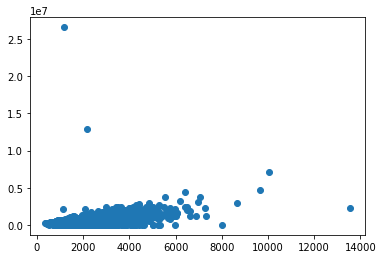

In [37]:
plt.scatter(df.sqft_living,df.price)

In [38]:
df[df["price"]>10000000]

,sqft_above,sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,street,city,statezip,country
4347,1550,640,3,2014-06-23,1.0,12899000.0,0,0,1956,NaN,3,2.5,2190,11394,5426 40th Ave W,Seattle,WA 98199,USA
4351,1180,0,4,2014-07-03,1.0,26590000.0,0,0,1992,NaN,3,2.0,1180,7793,12005 SE 219th Ct,Kent,WA 98031,USA


In [39]:
# Method 2 : create a new feature: "price_per_sqft_living", which means price per square foot of living space
df["price_per_sqft_living"] = df["price"]/df["sqft_living"]

In [40]:
# List the price per square footage in ascending order 
# Show first 15 rows for observation
sorted(df[df["price_per_sqft_living"]!=0].price_per_sqft_living)[0:14]

[10.0,
 32.072243346007603,
 57.668711656441715,
 87.647058823529406,
 88.0,
 88.541666666666671,
 89.285714285714292,
 90.15384615384616,
 90.452261306532662,
 90.673575129533674,
 92.222222222222229,
 93.089552238805965,
 94.0,
 94.011627906976742]

In [41]:
# List the price per square footage in descending order
# Show first 15 rows for observation
sorted(df[df["price_per_sqft_living"]!=0].price_per_sqft_living,reverse=True)[0:14]

[22533.898305084746,
 5889.9543378995431,
 1964.1964285714287,
 1004.7619047619048,
 800.0,
 769.23076923076928,
 745.94594594594594,
 743.64406779661022,
 733.22981366459624,
 725.80645161290317,
 720.83333333333337,
 714.66165413533838,
 711.34020618556701,
 703.81231671554247]

Observation:
* Among the top 15 smallest value, it looks like the top 3 (10,32,57) are outliers
* Among the top 15 largest value, it looks like the top 4 (22533,5889,1964,1004) are outliers 
 
 So we subset 2 types of outlier in below:

In [42]:
# Outlier type1: Price per square footage living space is too large 
df[df["price_per_sqft_living"]>800]

,sqft_above,sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,street,city,statezip,country,price_per_sqft_living
4347,1550,640,3,2014-06-23,1.0,12899000.0,0,0,1956,NaN,3,2.5,2190,11394,5426 40th Ave W,Seattle,WA 98199,USA,5889.954338
4348,1050,1050,3,2014-05-08,1.0,2110000.0,0,0,1959,NaN,4,1.0,2100,9200,14070 Military Rd S,Tukwila,WA 98168,USA,1004.761905
4349,1120,0,3,2014-05-05,1.0,2199900.0,0,0,1969,2014.0,4,1.5,1120,5427,19009-19021 SE 266th St,Covington,WA 98042,USA,1964.196429
4351,1180,0,4,2014-07-03,1.0,26590000.0,0,0,1992,NaN,3,2.0,1180,7793,12005 SE 219th Ct,Kent,WA 98031,USA,22533.898305


In [43]:
# Outlier type2: Price per square footage living space is too small 
df[(df["price_per_sqft_living"]<60) & (df["price_per_sqft_living"]!=0)]

,sqft_above,sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,street,city,statezip,country,price_per_sqft_living
4346,2630,0,4,2014-06-01,2.0,84350.0,0,0,1953,NaN,4,2.00,2630,16475,9033 NE 32nd St,Yarrow Point,WA 98004,USA,32.072243
4350,2170,1090,4,2014-05-14,1.0,188000.0,0,0,1968,NaN,4,2.75,3260,19542,1525 79th Pl NE,Medina,WA 98039,USA,57.668712
4352,780,0,1,2014-05-06,1.0,7800.0,0,0,1942,NaN,2,1.00,780,16344,4229 S 144th St,Tukwila,WA 98168,USA,10.000000


In [44]:
# Combine two tables above. We can show all the outliers:
pd.concat([df[df["price_per_sqft_living"]>800], df[(df["price_per_sqft_living"]<60) & (df["price_per_sqft_living"]!=0)]])

,sqft_above,sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,street,city,statezip,country,price_per_sqft_living
4347,1550,640,3,2014-06-23,1.0,12899000.0,0,0,1956,NaN,3,2.50,2190,11394,5426 40th Ave W,Seattle,WA 98199,USA,5889.954338
4348,1050,1050,3,2014-05-08,1.0,2110000.0,0,0,1959,NaN,4,1.00,2100,9200,14070 Military Rd S,Tukwila,WA 98168,USA,1004.761905
4349,1120,0,3,2014-05-05,1.0,2199900.0,0,0,1969,2014.0,4,1.50,1120,5427,19009-19021 SE 266th St,Covington,WA 98042,USA,1964.196429
4351,1180,0,4,2014-07-03,1.0,26590000.0,0,0,1992,NaN,3,2.00,1180,7793,12005 SE 219th Ct,Kent,WA 98031,USA,22533.898305
4346,2630,0,4,2014-06-01,2.0,84350.0,0,0,1953,NaN,4,2.00,2630,16475,9033 NE 32nd St,Yarrow Point,WA 98004,USA,32.072243
4350,2170,1090,4,2014-05-14,1.0,188000.0,0,0,1968,NaN,4,2.75,3260,19542,1525 79th Pl NE,Medina,WA 98039,USA,57.668712
4352,780,0,1,2014-05-06,1.0,7800.0,0,0,1942,NaN,2,1.00,780,16344,4229 S 144th St,Tukwila,WA 98168,USA,10.000000


In [45]:
# Drop the those outliers:
df = df.drop(pd.concat([df[df["price_per_sqft_living"]>800], df[(df["price_per_sqft_living"]<60) & (df["price_per_sqft_living"]!=0)]]).index)

In [46]:
# Error fixed , no outlier exists now. 
pd.concat([df[df["price_per_sqft_living"]>800], df[(df["price_per_sqft_living"]<60) & (df["price_per_sqft_living"]!=0)]])
# we don't this column we created anymore.
del df['price_per_sqft_living']

##  5. Duplications

* In this section, I use duplicated() to detect the duplications. I didn't assign subset parameter, so by default the function will use all of the columns to find the duplication.

 


In [47]:
# Shows duplicate records
df[df.duplicated(keep=False)]

,sqft_above,sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,street,city,statezip,country
4336,2670,0,3,2014-05-22,2.0,657500.0,0,0,1989,NaN,3,2.5,2670,10496,1917 235th Ct NE,Sammamish,WA 98074,USA
4337,2670,0,3,2014-05-22,2.0,657500.0,0,0,1989,NaN,3,2.5,2670,10496,1917 235th Ct NE,Sammamish,WA 98074,USA


Observation: 
* these two rows are identical. So I decide to drop one of them to fix the duplication problem.

In [48]:
# Delete the duplicate row
df = df.drop(df.loc[4336:4336].index)

In [49]:
# Error fixed , no duplication exists.
df[df.duplicated(keep=False)]

,sqft_above,sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,street,city,statezip,country


##  6.Missing value

*  I found column "price" is the only one that we need to impute missing value. Some of value in column "price" is 0. My strategy is to use linear regression to make the prediction. In other words, data that have actual price value is our training data, and I trained a ridge regression model to make the price prediction on those data with missing price.

 


In [50]:
# First check if there is NA in the columns
df.isnull().any()

sqft_above       False
sqft_basement    False
condition        False
date             False
floors           False
price            False
view             False
waterfront       False
yr_built         False
yr_renovated      True
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
street           False
city             False
statezip         False
country          False
dtype: bool

In [51]:
# Seperate the data using "price", so we can train the model using "df_price_train" and make the imputation on "df_price_missing"
df_price_missing = df[df["price"]==0]
df_price_train =  df[df["price"]!=0]

In [52]:
len(df_price_missing)

248

In [53]:
# check the correlation between "price" and other variables

print("Find most important features relative to target")
corr = df.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
print(corr.price.drop("price"))


Find most important features relative to target
sqft_living      0.647032
sqft_above       0.551725
bathrooms        0.480081
view             0.347729
sqft_basement    0.317806
bedrooms         0.301785
floors           0.237813
waterfront       0.203336
yr_renovated     0.115877
sqft_lot         0.081120
condition        0.041056
yr_built         0.023359
Name: price, dtype: float64


In [54]:
# Make a variable list for the convience for the next part
# Drop price(target variable) and yr_renovated(too many missing data)
variable_list=corr.price.drop(["price","yr_renovated"])
variable_list=variable_list.keys().tolist()

Observation:
* Above list the most important variables relative to our targets. I choose to use ridge regression for two reasons. 
* First, Using  L2 regularization can make our model less likely to overfit.
* Second, choosing to use ridge regression also makes feature selection easier. 

In [55]:
x = df_price_train[variable_list]
y = df_price_train["price"]
x_test = df_price_missing[variable_list]
map(pd.np.shape,[x, y, x_test])

[(4345, 11), (4345L,), (248, 11)]

In [56]:
# Search for alpha value (parameter of ridge regression)
# 10 fold cross validation as the validation framework
# r-squared as the scoring method
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60], cv = 10 ,scoring = "r2")
ridge.fit(x, y)
alpha = ridge.alpha_
print "Best alpha :", alpha

Best alpha : 6


In [57]:
print("Try search again for a better alpha around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10,scoring = "r2")
ridge.fit(x, y)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Try search again for a better alpha around 6
('Best alpha :', 6)


So now we will set alpha as 6

In [58]:
# Set alpha for ridge regression
ridge = Ridge(alpha=6)

In [59]:
# fit the model and make a prediction on data without price value
ridge.fit(x,y)
ridge.predict(x_test)


array([  523087.63885079,    70033.2844117 ,   382894.98135942,
         671334.4585993 ,   654804.99240063,   832810.28771767,
         864088.30048798,   930586.20294874,   501831.71397984,
         373988.39074173,  1011159.02205763,   448700.37516609,
         542505.04723902,   339065.73447002,   438338.07439388,
         512217.18885469,    90831.21517996,   420133.28344899,
         922431.29991436,   571191.38567116,   768935.93053093,
         538250.21304264,   568223.09075962,   654798.65202467,
         633352.04456521,   404926.64692481,   476400.68903837,
         576174.6774486 ,   587888.28801449,  1037590.55442735,
        1163067.90630246,  1113315.73718071,   386769.3698053 ,
        1432509.39640387,   490498.13464362,   409739.26950184,
         451276.76054944,  1102995.86251785,   396657.31890293,
         359635.30628037,   200953.04470959,   311719.4374976 ,
        1013865.59576001,   335095.37748935,   464722.76823925,
         533161.35283952,  1816001.26718

In [60]:
prediction=ridge.predict(x_test) 

In [61]:
# Use predicted value to impute missing price
df_price_missing.loc[:,"price"] = prediction

C:\Users\henry112358\Anaconda\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [62]:
# Combine to parts back
final_data=pd.concat([df_price_missing,df_price_train])

In [63]:
# No missing price anymore
final_data[final_data["price"]==0]

,sqft_above,sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,street,city,statezip,country


## Task 3  Export the dataframe after cleaning to .csv file<br>

In [64]:
# Export csv file

final_data.to_csv("Chang_28047397_ass2_data.csv")